due nov 8th


Submit this assignment as a Python notebook that shows the code and the final plots.
Problem 1
Let’s simulate mutations during PCR. Assume your are amplifying a sequence of L = 100 base pairs starting
from a single sequence. Each PCR cycle the number of molecules doubles, and the entire amplification
consists of n = 13 cycles. At each duplication event, every base pair is copied correctly with probability 1−µ
or replaced by a different nucleotide with probability µ; all three possible substitutions occur at equal
probability µ/3. In this problem, we will explore three values of µ: 10−4
, 10−3
, and 10−2
. For simplicity,


we assume that only the new strand could be mutated; the parent strain maintains its original state after
duplication.
For each mutation rate do the following. Determine the expected number of distinct sequences at the end of
the PCR. Visualize the distribution of relative abundances of these sequences. Compute the effective number
of sequences using the definition based on entropy.

In [72]:
import random
import matplotlib.pyplot as plt
import math


def pcr(seq, u):
    """
    creates a list of the strands generated after 13 rounds of duplication
    """
    #initializing the list to contain all the strands
    strands = [seq]
    for i in range(13):
        for j in range(len(strands)):
            newStrand = ''
            for k in strands[j]:
                num = random.random()
                if num > u:
                    newStrand += k
                else:
                    if k == 'A':
                        newStrand += random.choice(['T','C','G'])
                    elif k == 'T':
                        newStrand += random.choice(['A','C','G'])
                    elif k == 'C':
                        newStrand += random.choice(['T','A','G'])
                    else:
                        newStrand += random.choice(['T','C','A'])
            strands.append(newStrand)
    
    #creates a list of unique sequences from the list of strands
    unique = []
    for i in strands:
        if i not in unique:
            unique.append(i)
    print('number of unique sequences: ', len(unique))
    
    #loops through strands to create a list of counts for each of the unique sequences
    counts = [0]* len(unique)
    for i in strands:
        for j in range(len(unique)):
            if i == unique[j]:
                counts[j] += 1
    
    #creates a graph of the counts of different unique sequences
    x = range(0,len(unique))
    plt.figure(figsize=(16,7))
    plt.bar(x, counts)
    plt.xlabel('unique sequences')
    plt.ylabel('sequence counts')
    plt.title('PCR with mutation rate of '+ str(u))
    
    #calculates the effective number of sequences using Shannon's entropy
    ps = [0]* len(counts)
    for i in range(len(counts)):
        ps[i] = 1/counts[i]
    H = 0
    for i in ps:
        H += (i*math.log(1/i,2))
    print('effective number of sequences: ',H)
    

In [75]:
#creates a random sequence of 100 bases in length
s = ''
for i in range(100):
    s += random.choice(['A','T','C','G'])
print(s)

TGCCGATCGGCTCAGTTACCGTGAAAAACCCGGAATGCAAGTGGGCGTATAGCCTTGTCCCGCCACTTTTGAGCCAAATATCGCCACGTTAGATCATCTT


number of unique sequences:  573
effective number of sequences:  150.7298692016111


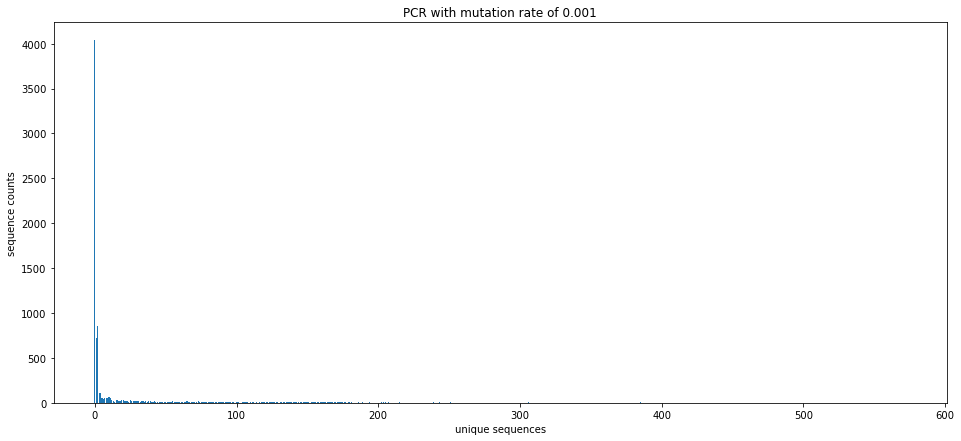

In [76]:
pcr(s, 10E-4)

number of unique sequences:  5055
effective number of sequences:  689.1691942669717


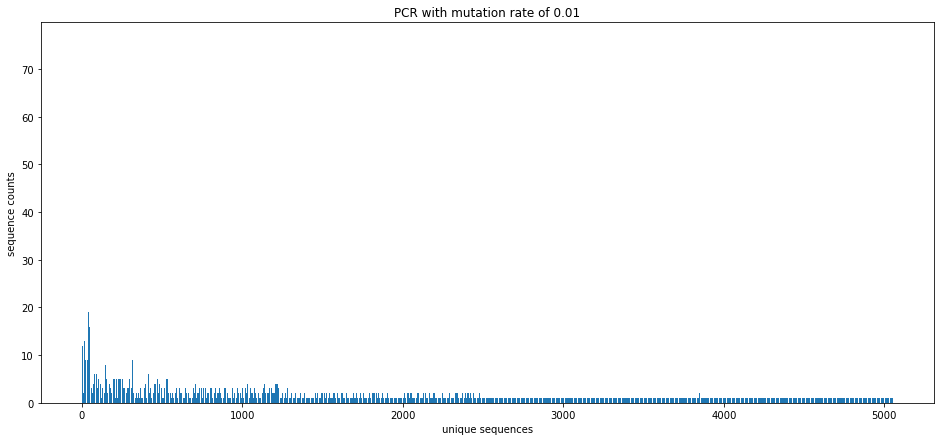

In [77]:
pcr(s, 10E-3)

number of unique sequences:  8192
effective number of sequences:  0.0


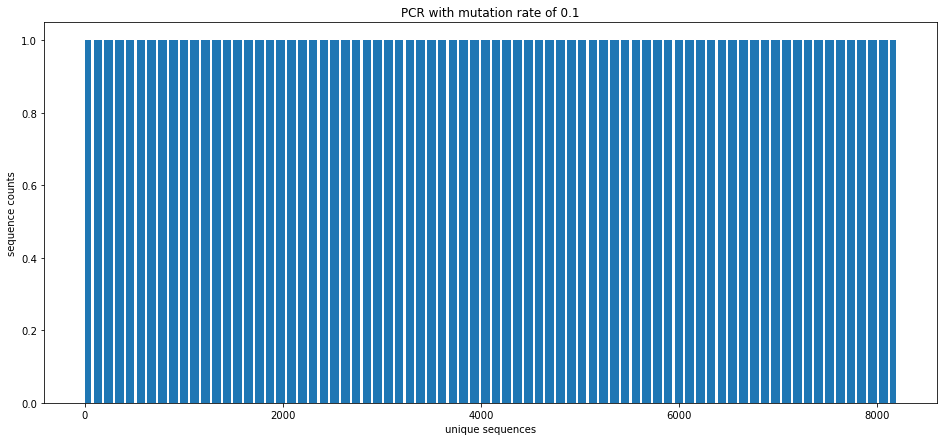

In [78]:
pcr(s, 10E-2)

In [59]:
def ci(seq, u):
    """
    returns the effective number of sequences
    """
    #initializing the list to contain all the strands
    strands = [seq]
    for i in range(13):
        for j in range(len(strands)):
            newStrand = ''
            for k in strands[j]:
                num = random.random()
                if num > u:
                    newStrand += k
                else:
                    if k == 'A':
                        newStrand += random.choice(['T','C','G'])
                    elif k == 'T':
                        newStrand += random.choice(['A','C','G'])
                    elif k == 'C':
                        newStrand += random.choice(['T','A','G'])
                    else:
                        newStrand += random.choice(['T','C','A'])
            strands.append(newStrand)
    
    #creates a list of unique sequences from the list of strands
    unique = []
    for i in strands:
        if i not in unique:
            unique.append(i)
            
    #loops through strands to create a list of counts for each of the unique sequences
    counts = [0]* len(unique)
    for i in strands:
        for j in range(len(unique)):
            if i == unique[j]:
                counts[j] += 1
    
    #calculates the effective number of sequences using Shannon's entropy
    ps = [0]* len(counts)
    for i in range(len(counts)):
        ps[i] = 1/counts[i]
    H = 0
    for i in ps:
        H += (i*math.log(1/i,2))
    
    return H



In [74]:
def cint(u):
    #calculates confidence interval for effective number of sequences 
    #90% confidence level - z* 1.645
    for i in range(10):
        s = ''
        for i in range(100):
            s += random.choice(['A','T','C','G'])
        vals.append(ci(s, u))
    
    m = sum(vals)/len(vals)
    st = 0
    for i in vals:
        st += (i-m)**2
    st = math.sqrt(st*(1/len(vals)))
    print('confidence interval: ',m, '±', round((1.645 * st)/math.sqrt(len(vals)),3))


In [69]:
cint(10E-4)

confidence interval:  145.36844310901856 ± 4.965


In [70]:
cint(10E-3)

confidence interval:  688.1688732914756 ± 4.7


In [71]:
cint(10E-2)

confidence interval:  0.05 ± 0.078
